**Aman Dubal T076**

Aim : Principal Component Analysis (PCA):\
1. Perform PCA on a dataset to reduce dimensionality.
2. Evaluate the explained variance and select the appropriate number of principal
components.
3. Visualize the data in the reduced-dimensional space.

### Reducing Features Using Principal Components

StudentsPerformance.csv
1. Description:
This dataset contains academic performance records of students along with demographic and social factors that may influence their scores.

2. Data Includes:
Gender,
Race/ethnicity,
Parental education level,
Lunch type (standard/free),
Test preparation course,
Math score,
Reading score,
Writing score.
3. Use :
Used for PCA because it has multiple numerical features that can be reduced while keeping variance.

In [1]:
# Load libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the data
df = pd.read_csv("StudentsPerformance.csv")

# Select only numeric features (e.g., math, reading, writing scores)
X = df.select_dtypes(include="number")

# Standardize the feature matrix
X_scaled = StandardScaler().fit_transform(X)

# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X_scaled)

# Show results
print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_pca.shape[1])


Original number of features: 3
Reduced number of features: 3


Plotting above data

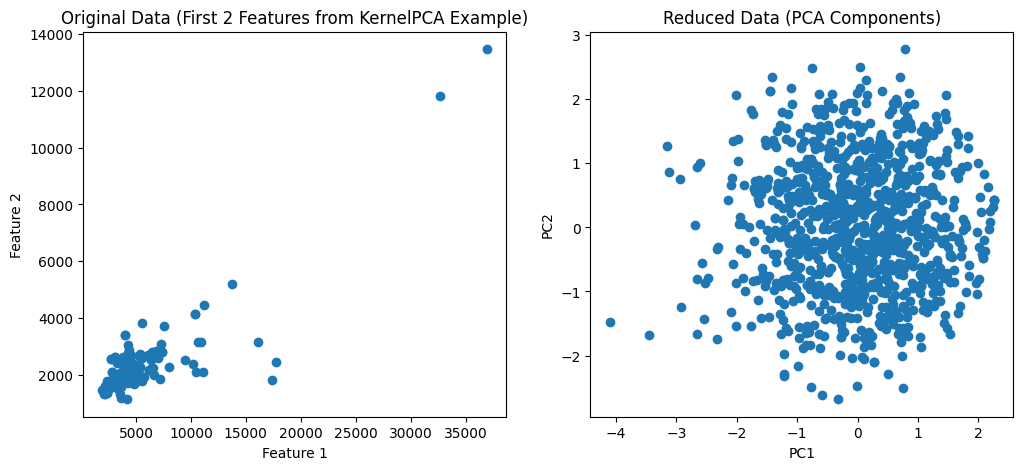

In [8]:
import matplotlib.pyplot as plt

# Plot original data (using two original features)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
# X is currently a numpy array from the KernelPCA example, so .iloc is not available.
# Access elements directly with array slicing.
# Also, X.columns will not exist for a numpy array, so use generic labels.
plt.scatter(X[:,0], X[:,1])
plt.title("Original Data (First 2 Features from KernelPCA Example)")
plt.xlabel("Feature 1") # Changed from X.columns[0]
plt.ylabel("Feature 2") # Changed from X.columns[1]

# Plot reduced data (PCA components)
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("Reduced Data (PCA Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

After applying PCA, the number of features is reduced, not the number of data points. PCA standardizes the data and projects it onto new axes with smaller ranges, which causes the points to appear closer together in the plot. So even though the right graph looks more clustered, it actually represents the same data using fewer dimensions, meaning PCA successfully reduced the feature space while preserving most of the variance.

### Reducing Features When Data Is Linearly Inseparable

Instagram data.csv
1. Description:

This dataset contains numerical statistics related to Instagram accounts or posts, mainly focused on engagement metrics.

2. Data Includes:
 Followers,
Likes,
Comments,
Engagement rate,
Impressions,
Reach,

3. Use:
Used for Kernel PCA because the data shows non-linear patterns, making it suitable for non-linear dimensionality reduction.

In [4]:
# Load libraries
import pandas as pd
from sklearn.decomposition import KernelPCA

# Load the data
df = pd.read_csv("Instagram data.csv", encoding="latin1")

# Take only numeric columns
numeric = df.select_dtypes(include="number")

# For 2D example like make_circles, use first two numeric columns
X = numeric.iloc[:, :2].values   # (change if you want specific columns)

# Apply kernel PCA with radial basis function (RBF) kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
X_kpca = kpca.fit_transform(X)

print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_kpca.shape[1])

Original number of features: 2
Reduced number of features: 1


Plotting the data

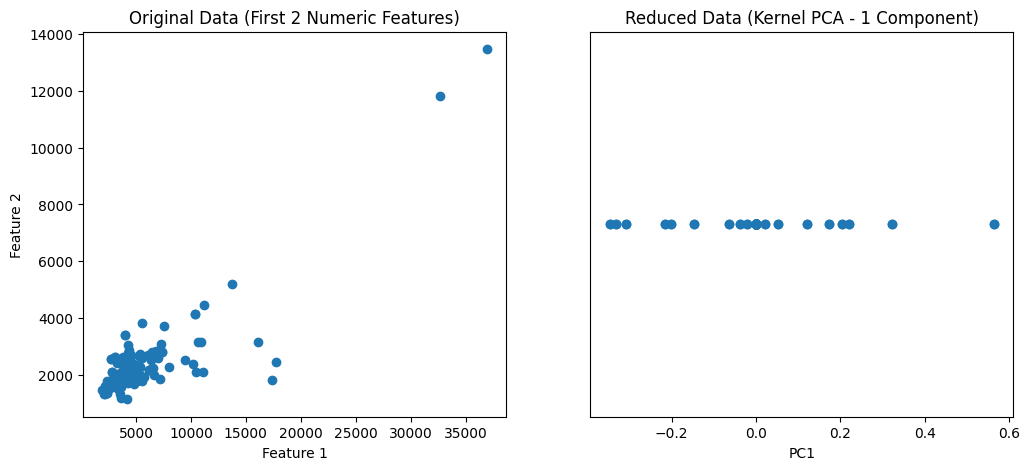

In [7]:
import matplotlib.pyplot as plt

# Plot original data
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1])
plt.title("Original Data (First 2 Numeric Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot reduced data (1D Kernel PCA)
plt.subplot(1,2,2)
plt.scatter(X_kpca, [0]*len(X_kpca))   # plot along a line
plt.title("Reduced Data (Kernel PCA - 1 Component)")
plt.xlabel("PC1")
plt.yticks([])

plt.show()


In the original plot, the data is spread across two numeric features with very large value ranges, which makes the points appear scattered. After applying Kernel PCA, the data is reduced to only one component, meaning each sample is now represented by a single value instead of two features.

Because the reduced data has only one dimension, it is plotted along a single horizontal line, which makes the points look compressed. The number of data points remains the same, but the feature space is reduced from 2D to 1D, showing that Kernel PCA successfully reduced the dimensionality while keeping the main structure of the data.

### Reducing Features by Maximizing Class Separability

heart_statlog_cleveland_hungary_final.csv
1. Description:
This dataset contains medical records used to predict the presence of heart disease.

2. Data Includes:
Age,
Sex,
Chest pain type,
Resting blood pressure,
Cholesterol,
Fasting blood sugar,
ECG results,
Max heart rate,
Exercise-induced angina,
Target (0 = no heart disease, 1 = heart disease)

3. Use :
Used for LDA because it has a clear target class, allowing dimensionality reduction that improves class separation.

In [3]:
# Load libraries
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the data
df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

# Set the target column name (change if your file uses another name)
target_column = "target"

# Features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Create an LDA that will reduce the data down to 1 feature
lda = LinearDiscriminantAnalysis(n_components=1)

# Run LDA and use it to transform the features
X_lda = lda.fit(X, y).transform(X)

# Print the number of features
print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_lda.shape[1])

# View the ratio of explained variance
print("Explained variance ratio:", lda.explained_variance_ratio_)


Original number of features: 11
Reduced number of features: 1
Explained variance ratio: [1.]


Plotting the data

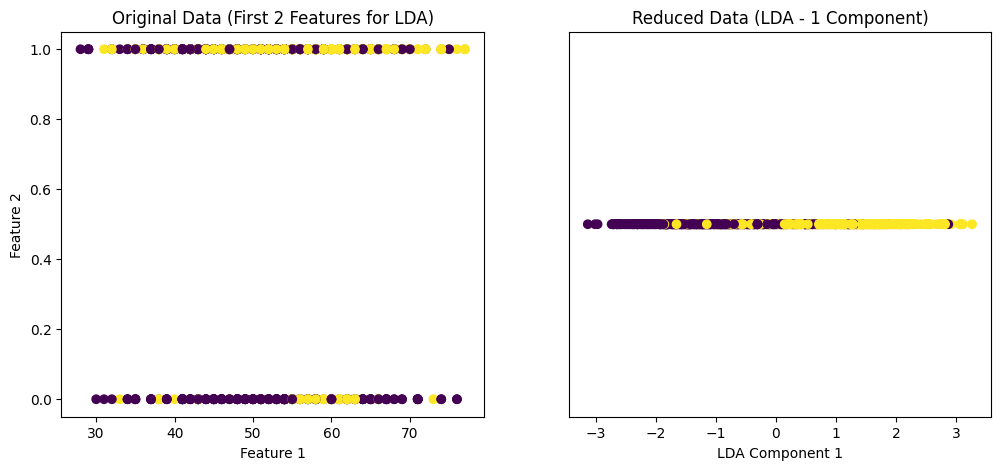

In [11]:
import matplotlib.pyplot as plt
import pandas as pd # Import pandas locally for data loading

# Reload the data specific to the LDA example to ensure X and y are consistent
df_lda_plot = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
target_column_lda_plot = "target"
X_lda_plot_original_features = df_lda_plot.drop(columns=[target_column_lda_plot]).values # Convert to numpy array for plotting
y_lda_plot_target = df_lda_plot[target_column_lda_plot]

# Plot original data (using first 2 features from the LDA dataset)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
# Use the locally loaded X and y for consistent plotting
plt.scatter(X_lda_plot_original_features[:,0], X_lda_plot_original_features[:,1], c=y_lda_plot_target)
plt.title("Original Data (First 2 Features for LDA)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot LDA reduced data (1D)
plt.subplot(1,2,2)
# X_lda should be globally available and consistent with y_lda_plot_target
plt.scatter(X_lda, [0]*len(X_lda), c=y_lda_plot_target)
plt.title("Reduced Data (LDA - 1 Component)")
plt.xlabel("LDA Component 1")
plt.yticks([])

plt.show()

In the original plot, the data points from both classes overlap when using the first two features, making it difficult to clearly separate the classes. After applying LDA, the data is reduced to one component that maximizes class separation, meaning LDA finds the direction that best distinguishes the two target groups.

When plotted, the reduced data appears along a single line, but the two classes are now more clearly separated along that axis. This shows that LDA successfully reduced the dimensionality while improving class separability, which is its main goal.